In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from airsenal.framework.utils import *
from airsenal.framework.prediction_utils import fit_bonus_points

In [2]:
df = pd.read_sql(session.query(PlayerScore).statement, session.bind)
df.set_index("id", inplace=True)
df.head()

,player_team,opponent,points,goals,assists,bonus,conceded,minutes,player_id,result_id,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bps,influence,creativity,threat,ict_index
id,,,,,,,,,,,,,,,,,,,,,
1,SOU,BUR,0,0,0,0,0,0,575,4.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,SOU,LIV,0,0,0,0,0,0,575,16.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,SOU,BHA,0,0,0,0,0,0,575,23.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,SOU,MUN,0,0,0,0,0,0,575,31.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
5,SOU,SHU,0,0,0,0,0,0,575,44.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [3]:
players = pd.read_sql(session.query(Player).statement, session.bind)
players.set_index("player_id", inplace=True)
players.head()

,fpl_api_id,name
player_id,,
1,1.0,Mesut Özil
2,2.0,Sokratis Papastathopoulos
3,3.0,David Luiz Moreira Marinho
4,4.0,Pierre-Emerick Aubameyang
5,5.0,Cédric Soares


## avg. bonus when playing more than 60, or 30-60 mins

In [4]:
df_more60, df_less60 = fit_bonus_points()

In [5]:
df_more60 = pd.merge(df_more60, players, how="left", left_index=True, right_index=True)
df_less60 = pd.merge(df_less60, players, how="left", left_index=True, right_index=True)

In [19]:
df_more60.dropna().sort_values(by="bonus", ascending=False).head(50)
# dropna to remove players without current fpl API id

,bonus,fpl_api_id,name
player_id,,,
405,1.194444,302.0,Bruno Miguel Borges Fernandes
536,0.981982,388.0,Harry Kane
377,0.904762,284.0,Phil Foden
361,0.895522,268.0,Sergio Agüero
637,0.887500,460.0,Raúl Jiménez
4,0.884211,4.0,Pierre-Emerick Aubameyang
271,0.871795,224.0,Jamie Vardy
502,0.857143,366.0,Danny Ings
375,0.854545,282.0,Gabriel Fernando de Jesus


In [20]:
df_less60.dropna().sort_values(by="bonus", ascending=False).head(15)

,bonus,fpl_api_id,name
player_id,,,
271,0.700000,224.0,Jamie Vardy
409,0.545455,306.0,Marcus Rashford
276,0.500000,229.0,Ayoze Pérez
502,0.500000,366.0,Danny Ings
6,0.466667,6.0,Alexandre Lacazette
479,0.307692,359.0,Lys Mousset
458,0.300000,506.0,Callum Wilson
152,0.300000,118.0,Tammy Abraham
332,0.300000,246.0,Joel Matip


## plot a player

In [8]:
idx = 4
get_player(idx).name

'Pierre-Emerick Aubameyang'

Text(0, 0.5, 'bps')

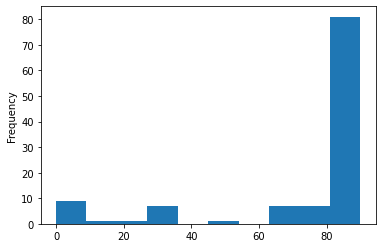

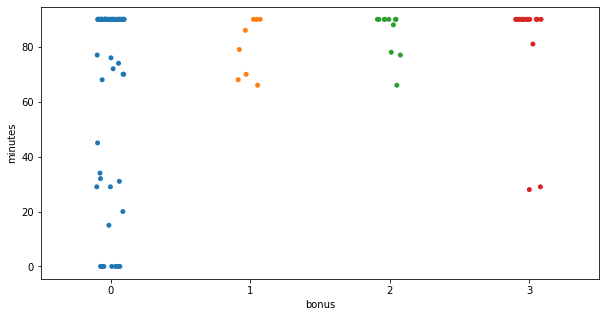

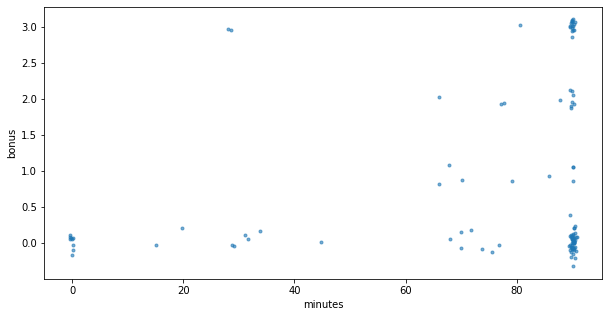

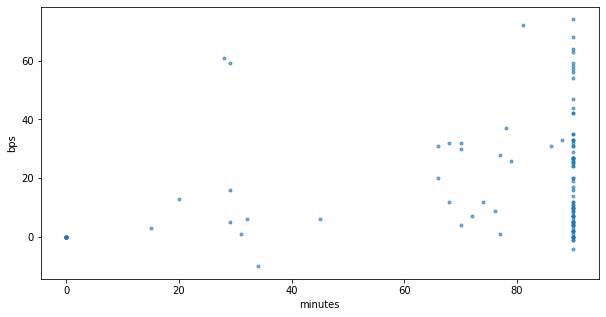

In [9]:
player = df[df.player_id == idx]

df[df.player_id == idx].minutes.plot.hist()

plt.figure(figsize=(10,5))
sns.stripplot(x="bonus", y="minutes", data=player)

plt.figure(figsize=(10, 5))
std = 0.1
plt.plot(player["minutes"] + np.random.normal(scale=3*std, size=len(player)),
         player["bonus"] + np.random.normal(scale=std, size=len(player)), '.', alpha=0.6)
plt.xlabel("minutes")
plt.ylabel("bonus")

plt.figure(figsize=(10,5))
plt.plot(player["minutes"], player["bps"], '.', alpha=0.6)
plt.xlabel("minutes")
plt.ylabel("bps")

## count of minutes played

(0.0, 500.0)

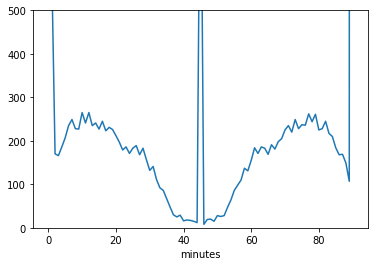

In [10]:
df.groupby("minutes").bonus.count().plot()
plt.ylim([0, 500])

## fit bonus vs mins across all players

[3.26341995e-05 4.91545962e-04 9.21680186e-04]


Text(0, 0.5, 'bonus')

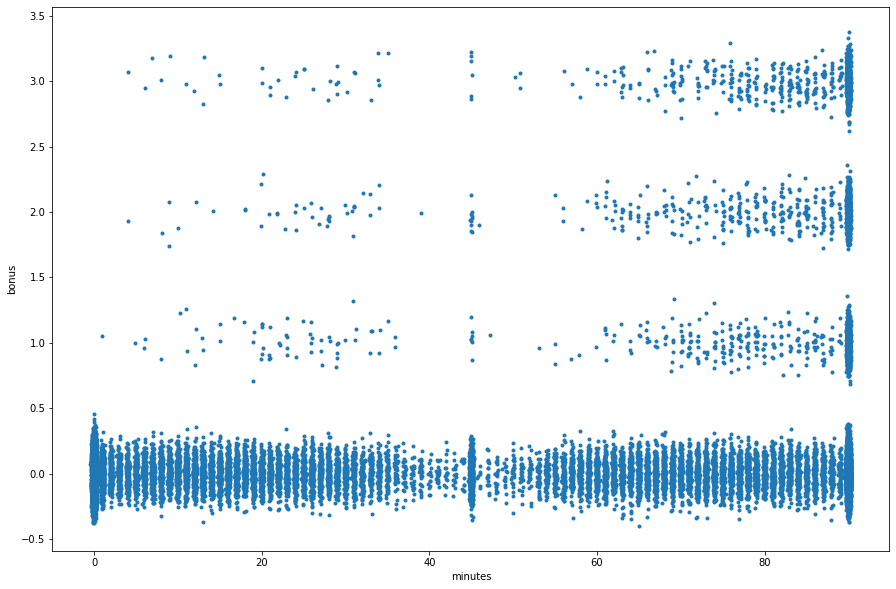

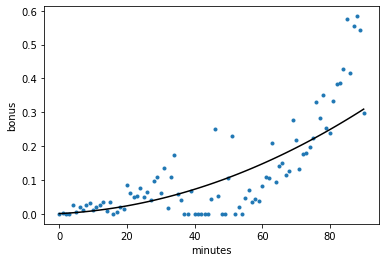

In [11]:
plt.figure(figsize=(15, 10))
std = 0.1
plt.plot(df["minutes"] + np.random.normal(scale=std, size=len(df)),
         df["bonus"] + np.random.normal(scale=std, size=len(df)), '.')
plt.xlabel("minutes")
plt.ylabel("bonus")

fit = np.polyfit(df["minutes"], df["bonus"], 2)
print(fit)
fit_vals = np.polyval(fit, np.arange(0,91))

plt.figure()

bonus_vs_mins = df.groupby("minutes").bonus.mean()
bonus_vs_mins.plot(linestyle='None', marker='.')
plt.plot(np.arange(0,91), fit_vals, 'k-')
plt.ylabel("bonus")

## scaling minutes fit for each player (player bonus "quality") - doesn't work well

In [12]:
df["exp_bonus"] = np.polyval(fit, df["minutes"])

unique_ids = df["player_id"].unique()
bonus_quality = pd.Series(index=unique_ids, dtype=float)

for idx in unique_ids:
    player_scores = df[df.player_id == idx]
    if sum(player_scores.minutes > 0) >= 10:
        player_fit = np.polyfit(player_scores["exp_bonus"],
                                player_scores["bonus"], 1)
        bonus_quality[idx] = player_fit[0]
    else:
        bonus_quality[idx] = 0

bonus_quality.sort_values(ascending=False)

/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


177     18.217993
1180     4.603743
608      4.076245
1127     3.989050
1108     3.978966
          ...    
1010    -0.127608
1199    -0.337441
90      -0.413058
908     -0.452803
1178    -0.801066
Length: 1255, dtype: float64

## bps

[0.18272664 0.10185292]


Text(0, 0.5, 'bps')

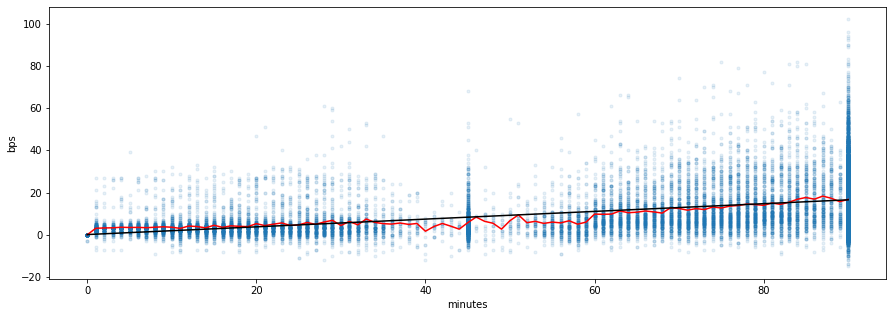

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df["minutes"], df["bps"], '.', alpha=0.1)
df.groupby("minutes").bps.mean().plot(color='r')


fit = np.polyfit(df["minutes"], df["bps"], 1)
print(fit)
fit_vals = np.polyval(fit, np.arange(0,91))
plt.plot(np.arange(0,91), fit_vals, 'k-')
plt.ylabel("bps")

<AxesSubplot:xlabel='bonus', ylabel='bps'>

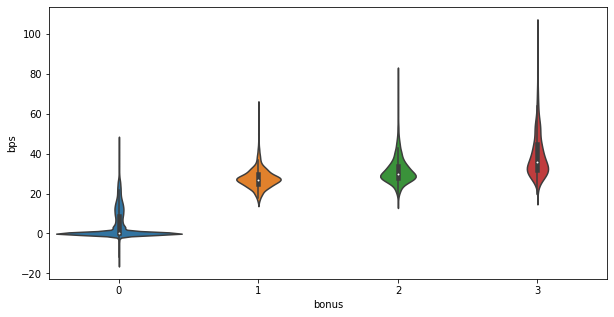

In [14]:
plt.figure(figsize=(10,5))
sns.violinplot(x="bonus", y="bps", data=df, width=0.9)

<AxesSubplot:xlabel='bps', ylabel='Density'>

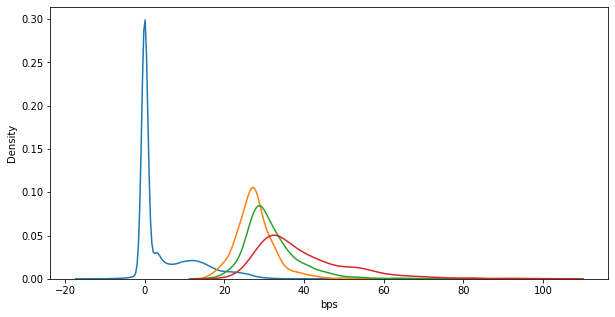

In [15]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[df.bonus==0, "bps"])
sns.kdeplot(df.loc[df.bonus==1, "bps"])
sns.kdeplot(df.loc[df.bonus==2, "bps"])
sns.kdeplot(df.loc[df.bonus==3, "bps"])

(-5.0, 40.0)

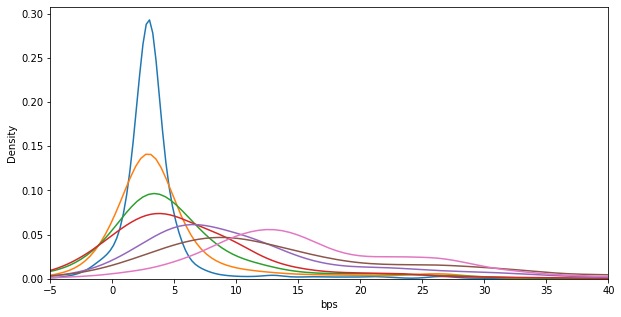

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[(df.minutes<=15) & (df.minutes >0), "bps"])
sns.kdeplot(df.loc[(df.minutes<=30) & (df.minutes >15), "bps"])
sns.kdeplot(df.loc[(df.minutes<=45) & (df.minutes >30), "bps"])
sns.kdeplot(df.loc[(df.minutes<=60) & (df.minutes >45), "bps"])
sns.kdeplot(df.loc[(df.minutes<=75) & (df.minutes >60), "bps"])
sns.kdeplot(df.loc[(df.minutes<90) & (df.minutes >75), "bps"])
sns.kdeplot(df.loc[(df.minutes==90), "bps"])

plt.xlim([-5, 40])

In [17]:
df[df.minutes>0].groupby("player_id").saves.mean().sort_values(ascending=False).head(20)

player_id
229    7.500000
605    4.500000
836    4.333333
195    4.142857
577    4.125000
750    4.000000
314    3.956522
964    3.827586
34     3.718750
910    3.710526
701    3.666667
784    3.638889
565    3.600000
435    3.500000
785    3.500000
254    3.458333
556    3.447368
483    3.419355
603    3.400000
122    3.350515
Name: saves, dtype: float64